# Projet Numérique "Calcul Différentiel"

Nils Giboureau et Martin Gascue

Vendredi 30 octobre 2020

## Table des matières

- Préambule

  - Dépendances logicielles

  - Différentiation automatique

- Ensembles de niveau

  - Exemples de référence

  - Analyse des ensembles de niveau (Q1, Q2, Q3, Q4)

- Construction des courbes de niveau

  - Méthode de Newton (Q5, T1, T2)

  - Génération des points (Q6, T3)

  - Bouclage et auto-intersection (Q7, T4, T5)

- Post-traitement

  - Interpolation (Q8, T6)

  - Intégration (T7, T8)

## Préambule

Dans un premier temps nous allons recopier toutes les fonctions définies dans l'énoncé, qui seront utilisées par la suite dans les programmes.

### Dépendances logicielles

In [1]:
pass

In [2]:
import autograd
import autograd.numpy as np

# Pandas
import pandas as pd

# Matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 10] # [width, height] (inches). 

# Jupyter & IPython
from IPython.display import display

### Différentiation automatique

In [3]:
def grad(f):
    g = autograd.grad
    def grad_f(x, y):
        return np.array([g(f, 0)(x, y), g(f, 1)(x, y)])
    return grad_f

In [4]:
def J(f):
    j = autograd.jacobian
    def J_f(x, y):
        return np.array([j(f, 0)(x, y), j(f, 1)(x, y)]).T
    return J_f

## Ensembles de niveau

On appelle *ensemble de niveau* $c \in \mathbb{R}$ d'une fonction $f : \mathbb{R}^2 \to \mathbb{R}$  l'ensemble du plan
$$
\{(x_1,x_2) \in \mathbb{R}^2 \; | \; f(x_1, x_2) = c\}.
$$


### Exemples de référence

In [5]:
def display_contour(f, x, y, levels):
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)
    fig, ax = plt.subplots()
    contour_set = plt.contour(
        X, Y, Z, colors="grey", linestyles="dashed", 
        levels=levels 
    )
    ax.clabel(contour_set)
    plt.grid(True)
    plt.xlabel("$x_1$") 
    plt.ylabel("$x_2$")
    plt.gca().set_aspect("equal")

#### Fonction quadratique

In [6]:
def f1(x1, x2):
    x1 = np.array(x1)
    x2 = np.array(x2)
    return 3.0 * x1 * x1 - 2.0 * x1 * x2 + 3.0 * x2 * x2 

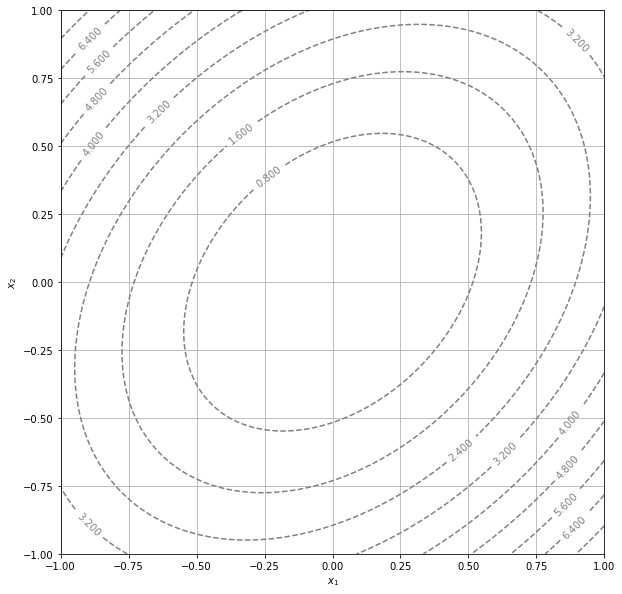

In [7]:
display_contour(
    f1, 
    x=np.linspace(-1.0, 1.0, 100), 
    y=np.linspace(-1.0, 1.0, 100), 
    levels=10 # 10 levels, automatically selected
)

#### Fonction de Rosenbrock

Source : [Fonction de Rosenbrock, Wikipédia](https://en.wikipedia.org/wiki/Rosenbrock_function)

$$
f_2 : (x_1,x_2) \in \mathbb{R}^2 \mapsto (x_1 - 1)^2 + (x_1 - x_2^2)^2
$$

In [8]:
def f2(x1, x2):
    return (x1 - 1)**2 + (x1 - x2**2)**2

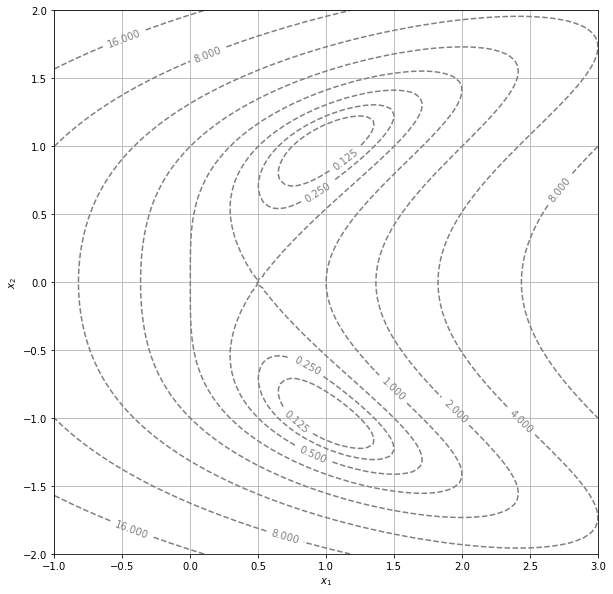

In [9]:
display_contour(
    f2, 
    x=np.linspace(-1.0, 3.0, 100), 
    y=np.linspace(-2.0, 2.0, 100), 
    levels=[2**i for i in range(-3, 8)] # levels: [0.125, 0.25, ..., 64, 128]
)

#### Fonction complexe

Source: [Courbe implicite, Wikipédia](https://en.wikipedia.org/wiki/Implicit_curve)

In [10]:
def f3(x, y):
    return np.sin(x + y) - np.cos(x * y) - 1 + 0.001 * (x * x + y * y) 

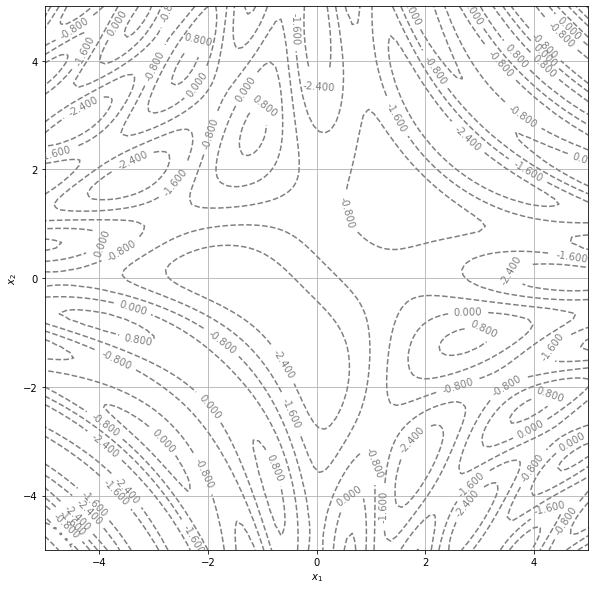

In [11]:
display_contour(
    f3, 
    x=np.linspace(-5.0, 5.0, 100), 
    y=np.linspace(-5.0, 5.0, 100), 
    levels=5, # 5 levels, automatically selected
)

### Analyse des ensembles de niveau

#### Question 1

Soit $c \in \mathbb{R}$.
On suppose que la fonction $f:\mathbb{R}^2 \to \mathbb{R}$ est continue et vérifie
$f(x_1, x_2) \to +\infty$ quand $\|(x_1,x_2)\| \to +\infty$.
Que peut-on dire de l'ensemble de niveau $c$ de $f$ ?

*Solution proposée :*

 On s'intéresse à l'ensemble de niveau $c$ de $f$ : 
$E=
\{(x_1,x_2) \in \mathbb{R}^2 \; | \; f(x_1, x_2) = c\}.
$

- Montrons que $E$ est fermé.

 Comme $f$ est continue, $\mathbb{R}^2$ est de dimension finie et $E$ est l'image réciproque par $f$ du singleton fermé $\lbrace c \rbrace$, alors $E$ est fermé.
 
  
- Montrons que $E$ est borné. 

 Comme $f(x_1, x_2) \to +\infty$ quand $\|(x_1,x_2)\| \to +\infty$, alors il existe $A>0$ tel que $\forall{(x_1,x_2)} \in \mathbb{R}^2, \|(x_1,x_2)\| \ge A \Rightarrow f(x_1,x_2) > c.$ 

 Donc, par contraposée, $(x_1,x_2) \in E \Rightarrow \|(x_1,x_2)\| < A.$ 

 D'où $E$ est borné.



Dans la suite la fonction $f$ est supposée continûment différentiable. On suppose également que le gradient $\nabla f$ ne s'annule pas dans un voisinage du point $x_0 = (x_{10}, x_{20}) \in \mathbb{R}^2$. On pose alors
$$
p(x_1, x_2) := \frac{\partial_2 f(x_0)}{\|\nabla f(x_0)\|} (x_1 - x_{10}) -
\frac{\partial_1 f(x_0)}{\|\nabla f(x_0)\|} (x_2 - x_{20}).
$$




#### Question 2
Comment interpréter géométriquement le terme $p(x_1,x_2)$ ?

*Solution proposée :*

On a $p(x_1,x_2) = \frac{1}{\|\nabla f(x_0)\|}\begin{vmatrix}
  x_1 - x_{10} & \partial_1 f(x_0) \\
 x_2 - x_{20} & \partial_2 f(x_0) \\
 \end{vmatrix}$.
 
 Il s'agit au signe près de l'aire du parallélogramme généré par le vecteur $\frac{\nabla f(x_0)}{\|\nabla f(x_0)\|}$ et le vecteur $x-x_0.$


#### Question 3

Montrer que dans un voisinage ouvert de $x_0$, on peut paramétriser l'ensemble de niveau $c:=f(x_0)$ au moyen de $p(x_1,x_2),$ c'est-à-dire qu'il existe un $\varepsilon > 0$ et une fonction (continûment différentiable) $\gamma :\left]-\varepsilon,\varepsilon \right[ \to \mathbb{R}^2$ tels que dans un voisinage ouvert de $x_0,$ $f(x_1,x_2) = c$ si et seulement si $(x_1, x_2) = \gamma(t)$ où $t = p(x_1, x_2)$.

*Solution proposée :*

Posons $h : (x,\lambda) \in \displaystyle \mathbb{R}^2 \times \mathbb{R} \mapsto (f(x)-c, p(x)-\lambda)$ continûment différentiable.
 
 La différentielle partielle  $\partial_x h (x_0,p(x_0))$ est associée à la matrice $J_h = \begin{pmatrix}
  \partial_1 f(x_0) &  \partial_2 f(x_0)\\
 \frac{\partial_2 f(x_0)}{\|\nabla f(x_0)\|} & -\frac{\partial_1 f(x_0)}{\|\nabla f(x_0)\|} \\
 \end{pmatrix}$. 

 Donc $\det (J_h)= -\|\nabla f(x_0)\| \ne 0$ par hypothèse. 
 
 Ainsi $\partial_x h$ est inversible en $(x_0, p(x_0)$).

 De plus, $h(x_0, p(x_0)) = 0$.

 Ainsi, par le théorème des fonctions implicites, il existe un $\varepsilon > 0$ et une fonction continûment différentiable $\gamma :\left]-\varepsilon,\varepsilon \right[ \to \mathbb{R}^2$ tels que dans un voisinage ouvert $U$ de $x_0$, $\forall{\lambda} \in \left]-\varepsilon,\varepsilon \right[, h(x,\lambda)=0 \Leftrightarrow x=\gamma (\lambda)$

 Or, $p(x_0)=0$ et $p$ est continue, donc il existe un voisinage ouvert de $x_0$ $V \subset U$ tel que $\forall{x} \in V, p(x) \in \left]-\varepsilon,\varepsilon \right[$

 Ainsi, $\forall{x} \in V$, $f(x)=c \Leftrightarrow h(x,p(x))=0 \Leftrightarrow x=\gamma (p(x))$

 D'où $\forall{x} \in V$, $f(x)=c \Leftrightarrow x=\gamma (t)$ où $t=p(x)$

#### Question 4

Montrer que pour tout $t \in \left]-\varepsilon, \varepsilon \right[$ :

  - le vecteur $\gamma'(t)$ est non nul (il fournit donc une tangente au chemin $\gamma$),

  - est orthogonal à $\nabla f(\gamma(t))$.

*Solution proposée :*

Soit $t \in \left]-\varepsilon,\varepsilon \right[$, $\partial_{\lambda}h (\gamma(t),t) = \begin{pmatrix}
  0\\
 -1\\
 \end{pmatrix}$ et $\partial_{x}h (\gamma(t),t) = \begin{pmatrix}
  \partial_1 f(\gamma(t)) &  \partial_2 f(\gamma(t))\\
 \frac{\partial_2 f(x_0)}{\|\nabla f(x_0)\|} & -\frac{\partial_1 f(x_0)}{\|\nabla f(x_0)\|} \\
 \end{pmatrix}$

 Donc $(\partial_{x}h (\gamma(t),t))^{-1} = - \frac{\|\nabla f(x_0)\|}{\partial_1 f(\gamma(t))\partial_1 f(x_0)+\partial_2 f(\gamma(t))\partial_2 f(x_0)}\begin{pmatrix}
   -\frac{\partial_1 f(x_0)}{\|\nabla f(x_0)\|} &  -\partial_2 f(\gamma(t))\\
 -\frac{\partial_2 f(x_0)}{\|\nabla f(x_0)\|} & \partial_1 f(\gamma(t))\\
 \end{pmatrix}$

 Ainsi, par la formule de la différentielle de $\gamma$, $\gamma'(t)= - \frac{\|\nabla f(x_0)\|}{\partial_1 f(\gamma(t))\partial_1 f(x_0)+\partial_2 f(\gamma(t))\partial_2 f(x_0)}\begin{pmatrix}
  \partial_2 f(\gamma(t))\\
 -\partial_1 f(\gamma(t))\\
 \end{pmatrix}$

 D'où $\gamma'(t)$ est orthogonal à $\nabla f(\gamma(t))$.

De plus, l'inversibilité de $\partial_{x}h (\gamma(t),t)$ implique la non-nullité de $\nabla f(\gamma(t))$.

D'où $\gamma'(t) \ne 0$.

## Construction des courbes de niveau

### Méthode de Newton

Afin de trouver des points sur des courbes de niveau, on souhaite implémenter un algorithme de résolution des équations de la forme $F(x) = 0$ où $F: \mathbb{R}^2 \to \mathbb{R}^2$, par la méthode de Newton, amorcée par un point de référence $x_0 \in \mathbb{R}^2$.

L'implémentation prendra la forme générale donnée ci-dessous. L'appel `x, y = Newton(F, x0, y0, eps, N)` devra renvoyer le couple des coordonnées d'un point $(x, y)$ qui est une solution approchée de $F(x,y)=0$ à proximité de $(x_0, y_0)$. La qualité de l'approximation produite est déterminée par le réel positif $\varepsilon > 0$, une approximation de la distance entre le point $(x,y)$ renvoyé par la fonction et la solution exacte. L'algorithme itératif s'interrompra si aucune approximation de la précision souhaitée n'a été trouvée en $N$ étapes. 

#### Question 5

L'application à laquelle nous destinons la fonction `Newton` demande-t'elle une grande précision ?
Choisir une valeur de `eps` qui semble raisonnable et justifier l'ordre de grandeur choisi.

*Solution proposée :*

Considérons que le programme est effectué dans un ordinateur de 15.6 pouces, soit 38 $cm$, dont la résolution est de 1366 $\times$ 768, c'est à dire 1366 pixels en longueur et 768 pixels en largeur. Alors il y a $\frac{1366}{38} \approx 36$ pixels par cm d'écran en longueur.

Considérons de plus que l'écran affiche un graphe dont l'unité correspond à 1 cm. Par conséquent il y a $\frac{1}{36} \approx 0.03$ unités par pixel en longueur.

Si $\epsilon$ est inférieur à 0.03, la différence n'est pas visible car un pixel peut afficher une seule valeur. Nous prendrons donc $\epsilon$ de l'ordre de 0.03, soit $\epsilon = 0.01$

In [12]:
N = 100
eps = 0.01

#### Tâche 1

Implémenter la fonction `Newton` en complétant le canevas ci-dessous

>Dans la fonction `Newton` :
- Nous appelons la fonction $G$, préalablement définie, qui donne un vecteur en sortie dont les coordonnées sont les contraintes à annuler
- Nous appliquons la méthode de Newton au point (x0, y0), puis ainsi de suite avec les points obtenus jusqu'à satisfaire les deux contraintes
- Nous donnons un booléen en argument qui détermine si nous stockons les valeurs des points obtenus progressivement dans une liste $L$. Cela permet soit de vérifier la fonction `Newton` en affichant les points soit d'exécuter la fonction sans encombrer la mémoire avec la création d'une liste $L$

In [13]:
def Newton(G, x0, y0, eps=eps, N=N, bool=False):
    L = [[x0, y0]]
    for i in range(N):
        x = x0 - np.dot(np.linalg.inv(J(G)(x0, y0)), G(x0, y0))[0]
        y = y0 - np.dot(np.linalg.inv(J(G)(x0, y0)), G(x0, y0))[1]
        if bool: L.append([x, y])
        if np.sqrt((x - x0)**2 + (y - y0)**2) <= eps:
            if bool:
                L = np.array(L)
                return L.T
            return x, y
        x0, y0 = x, y
    else:
        raise ValueError(f"no convergence in {N} steps.")

#### Tâche 2

Testez votre implémentation de la fonction `Newton` ! On suggère par exemple de l'utiliser pour chercher un point $(x_1, x_2)$ de la ligne de niveau $0.8$ de $f_1$ (cf. Exemples de référence) qui vérifie en outre $x_1 = x_2$ en utilisant le point initial $(0.8, 0.8)$. Puis de faire varier le point initial, la contrainte supplémentaire, etc. et de représenter graphiquement les résultats.

>Dans les cellules suivantes nous testons la fonction `Newton` avec chacune des trois fonctions définies en début de sujet. Pour cela nous utilisons les fonctions $f1$, $f2$ et $f3$ pour définir les fonctions $g1$, $g2$, et $g3$ définies de $\mathbb{R}^2$ à valeurs dans $\mathbb{R}^2$, entrées en argument de `Newton`.

>La première contrainte permet de choisir sur quelle ligne de niveau nous nous plaçons. Nous faisons varier les points initiaux aisi que la deuxième contrainte.

>Le point de départ est signalé graphiquement par la couleur jaune, celui d'arrivé par la couleur rouge et le chemin suivi est en orange.

In [14]:
def g1(x1, y1):
    x1 = np.array(x1)
    y1 = np.array(y1)
    return np.array([f1(x1, y1) - 0.8, x1 - y1])

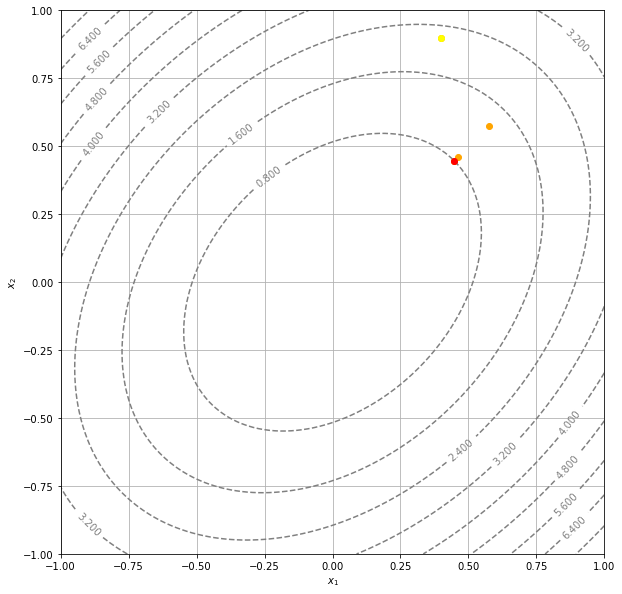

In [15]:
display_contour(
        f1, 
        x=np.linspace(-1.0, 1.0, 100), 
        y=np.linspace(-1.0, 1.0, 100), 
        levels=10 # 10 levels, automatically selected
        )
L = Newton(g1, 0.4, 0.90, eps, N, True)
plt.scatter(L[0], L[1], color='orange');
plt.plot(L[0][0], L[1][0], marker='o', color='yellow');
plt.plot(L[0][-1], L[1][-1], marker='o', color='red');

In [16]:
def g2(x1, y1):
            x1 = np.array(x1)
            y1 = np.array(y1)
            return np.array([f2(x1, y1) - 2.0, y1 - 1.0]) #la deuxième contrainte impose y=1.0

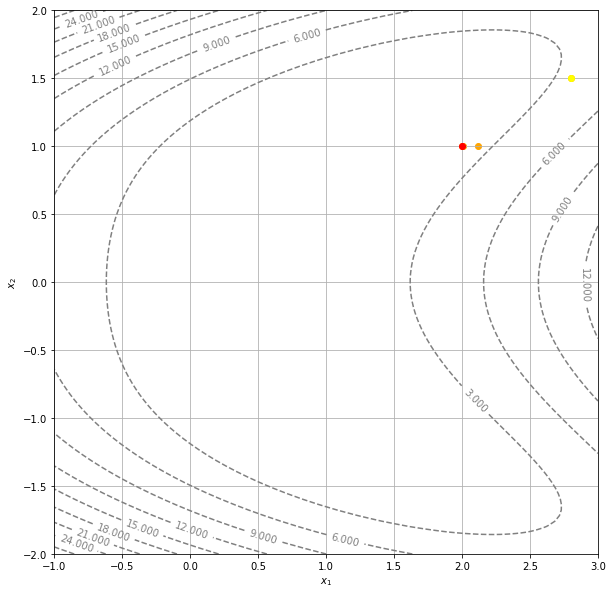

In [17]:
display_contour(
        f2, 
        x=np.linspace(-1.0, 3.0, 100), 
        y=np.linspace(-2.0, 2.0, 100), 
        levels=10 # 10 levels, automatically selected
        )
L = Newton(g2, 2.8, 1.5, eps, N, True)
plt.scatter(L[0], L[1], color='orange');
plt.plot(L[0][0], L[1][0], marker='o', color='yellow');
plt.plot(L[0][-1], L[1][-1], marker='o', color='red');

In [18]:
def g3(x1, y1):
            x1 = np.array(x1)
            y1 = np.array(y1)
            return np.array([f3(x1, y1) + 0.4, x1**2 - y1]) #expression quadratique (y=x**2) en deuxième contrainte

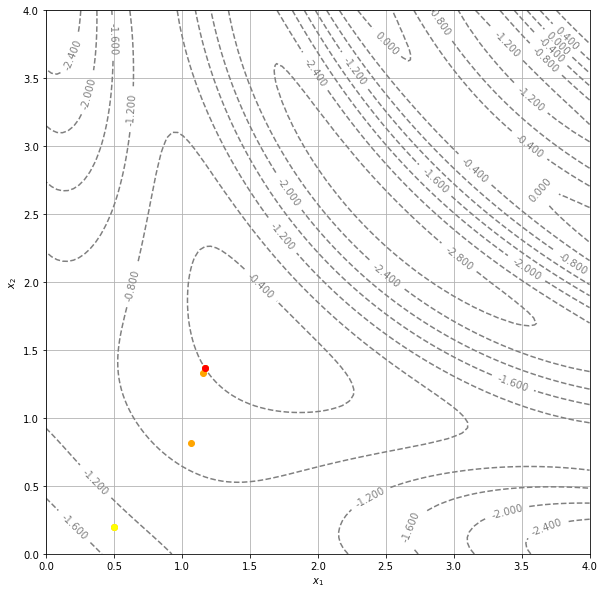

In [19]:
display_contour(
        f3, 
        x=np.linspace(0.0, 4.0, 100), 
        y=np.linspace(0.0, 4.0, 100), 
        levels=10 # 10 levels, automatically selected
        )
L = Newton(g3, 0.5, 0.2, eps, N, True)
plt.scatter(L[0], L[1], color='orange');
plt.plot(L[0][0], L[1][0], marker='o', color='yellow');
plt.plot(L[0][-1], L[1][-1], marker='o', color='red');

### Génération des points

#### Question 6 + Tâche 3
Comment, en partant d'un point de référence $(x_0, y_0)$ tel que $f(x_0, y_0)=c$, peut-on générer avec la méthode de Newton un point $(x_1, y_1)$ également tel que $f(x_1, y_1) = c$, mais à une distance $\delta > 0$ de $(x_0, y_0)$ et qui soit "à droite" quand on est en $(x_0, y_0)$ et qu'on regarde dans la direction de $\nabla f(x_0, y_0)$ ? Implémenter la fonction `level_curve` qui répète ce procédé $N-1$ fois et renvoie un tableau NumPy de taille `(2, N)` contenant les coordonnées des points correspondants, puis valider graphiquement le résultat au moyen des exemples de référence.

*Solution proposée :*

Nous savons que le gradient d'une fonction $f$ évalué au point $(x0, y0)$ est perpendiculaire à la tangente en ce point. Pour générer le point $(x1, y1)$ "à droite" de $(x0, y0)$ nous pouvons d'abord effectuer une rotation de $\frac{\pi}{2}$ du vecteur $\nabla f(x_0, y_0)$ dans le sens trigonométrique. Nous pouvons ensuite appliquer la fonction `Newton` au point obtenu par translation de $(x0, y0)$ selon ce vecteur. Si la première contrainte impose $f(x_0, y_0)=c$ et la deuxième contrainte impose que le point $(x1, y1)$ obtenu soit sur le cercle de centre $(x0, y0)$ et de rayon $delta$, alors le point $(x1, y1)$ satisfait les conditions souhaitées.

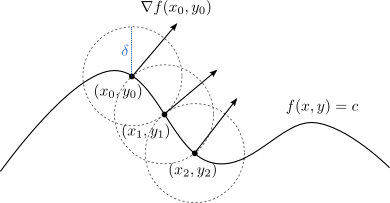

>Dans la fonction `level_curve` :
- Nous créons une fonction `rotation` permettant d'effectuer une rotation normalisée de $\frac{\pi}{2}$ sur le vecteur $\nabla f(x0, y0)$ dans le sens trigonométrique. Notons $a$, $b$ les points obtenus par translation du point initial $(x0, y0)$ selon le vecteur obtenu
- Nous appliquons la méthode de Newton à la fonction $g$ définie dans la fonction dont les contraintes permettent d'imposer $f(a, b)=c$ à l'une des fonctions $f1$, $f2$, $f3$ prise en argument de `level_curve`, et de rester sur le cercle de centre $(x0, y0)$ et de rayon $delta$
- Nous appliquons le même procédé au point obtenu, et nous enregistrons les abscisses et les ordonnées au fur et à mesure dans les tableaux $abs$, $ord$

In [20]:
def level_curve(F, x0, y0, delta=0.1, N=1000, eps=eps):
    c = F(x0, y0)
    abs, ord = [x0], [y0]
    def rotation(x0, y0): #rotation de pi/2 sens trigo
        a = x0 + (grad(F)(x0, y0)[1]*delta)/np.linalg.norm(grad(F)(x0, y0))
        b = y0 - (grad(F)(x0, y0)[0]*delta)/np.linalg.norm(grad(F)(x0, y0))
        return a, b
    for i in range(N):
        def g(x1, y1):
            return np.array([F(x1, y1) - c, (x1-x0)**2 + (y1-y0)**2 - delta**2])
        a, b = rotation(x0, y0)
        A=(Newton(g, a, b, eps, 100))
        abs.append(A[0])
        ord.append(A[1])
        x0, y0 = A[0] , A[1]
    return np.array([abs, ord])

Nous vérifions ensuite la fonction `level_curve` en traçant des courbes de niveau pour les trois fonctions $f1$, $f2$, $f3$.

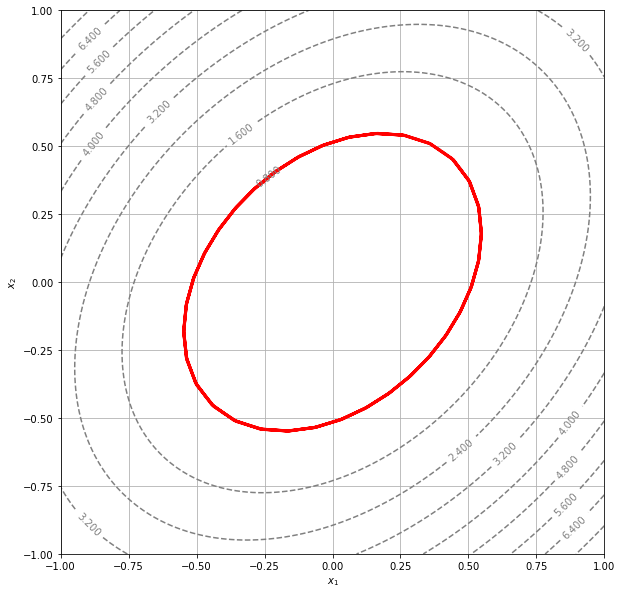

In [21]:
x0 = Newton(g1, 0.4, 0.90, eps=eps, N=N)[0]
y0 = Newton(g1, 0.4, 0.90, eps=eps, N=N)[1]

G=level_curve(f1, x0, y0, 0.1, 100, eps)

display_contour(
        f1, 
        x=np.linspace(-1.0, 1.0, 100), 
        y=np.linspace(-1.0, 1.0, 100), 
        levels=10)

plt.plot(G[0], G[1], color='red', linewidth=3);

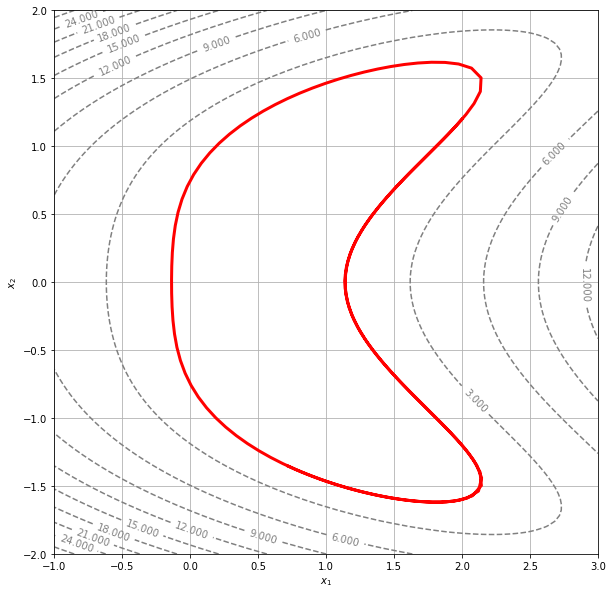

In [22]:
x0 = Newton(g2, 1.0, -1.35, eps=eps, N=N)[0]
y0 = Newton(g2, 1.0, -1.35, eps=eps, N=N)[1]

G=level_curve(f2, 2.0, 1.2, 0.1, 150, eps)

display_contour(
        f2,
        x=np.linspace(-1.0, 3.0, 100), 
        y=np.linspace(-2.0, 2.0, 100), 
        levels=10)

plt.plot(G[0], G[1], color='red', linewidth=3);

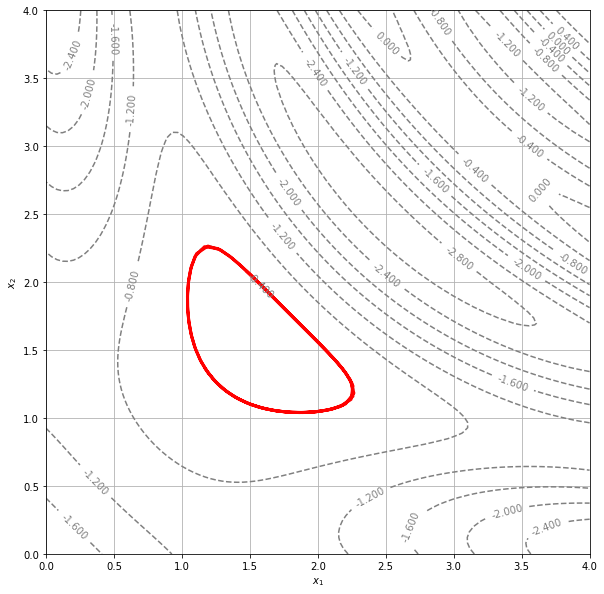

In [23]:
x0 = Newton(g3, 1.2, 1.7, eps, N)[0]
y0 = Newton(g3, 1.2, 1.7, eps, N)[1]

G=level_curve(f3, x0, y0, 0.1, 100, eps)

display_contour(
        f3,
        x=np.linspace(0.0, 4.0, 100),
        y=np.linspace(0.0, 4.0, 100),
        levels=10)

plt.plot(G[0], G[1], color='red', linewidth=3);

### Bouclage et auto-intersection

L'algorithme précédent est malheureusement susceptible de faire plusieurs fois le tour d'une courbe de niveau donnée. 

#### Question 7 + Tâche 4

Proposer une nouvelle implémentation de `level_curve` qui arrête l'algorithme et renvoie les points connus quand le segment formé par les deux derniers points produits intersecte l'un des segments produits auparavant. En étant (raisonnablement) optimiste, doit-on prendre la peine de tester l'intersection du dernier segment avec tous les segments déjà produits (ce qui prend du temps ...) ou juste avec le premier ? Pour répondre à cette question, on pourra se demander si les courbes de niveau similaires à celle de la fonction de Rosenbrock passant par le point $(0.5, 0)$ (cf. Exemples de référence) -- c'est-à-dire "auto-intersectantes" -- sont fréquentes ou rares et pourquoi.

*Solution proposée :*

Le cas où le segment formé par les deux derniers points produits intersecte l'un des segments produits auparavant correspond à l'existence d'un point col pour la fonction $f$ considérée, ie. un point $(x0, y0)$ tel que $\nabla f(x0, y0) = 0$ mais $f$ n'admette pas d'extremum local en ce point. Or, toutes les fonctions ne possèdent pas de point col, et lorsqu'elles en possèdent, ils sont peu nombreux.

Ces cas sont donc assez rares, c'est pourquoi nous les négligerons (d'autant plus qu'il faudrait tomber sur la bonne courbe de niveau) et nous comparerons simplement le dernier segment formé au premier.

Nous implémentons d'abord une fonction `intersec` qui prend en argument quatre points $a$, $b$, $c$, $d$ et un double delta et vérifie si le segment $\lceil a;b \rceil$ intersecte le segment $\lceil c;d \rceil$.

>Dans la fonction `intersec` :
- Nous déterminons l'équation de la droite passant par $a$ et $b$ et celle de la droite passant par $c$ et $d$
- Lorsque les coefficients directeurs des droites ne sont pas égaux, nous évaluons si la distance du point d'intersection aux quatre points $a$, $b$, $c$ et $d$ est inférieure à delta, auquel cas le point d'intersection est inclus dans chacun des segments
- Le cas d'égalité des coefficients directeurs (segments parallèles) n'est pas traité; l'évènement est très peu probable et sa réalisation ne nuit pas au bon fonctionnement du programme `level_curve_precis` (s'il a lieu, l'intersection se fait avec le deuxième segment produit)

In [24]:
def intersec(a, b, c, d, delta):
    #coefficients des expressions linéaires passant par les segments [a,b] et [c,d]
    coef1 = (b[1] - a[1])/(b[0] - a[0])
    coef2 = (d[1] - c[1])/(d[0] - c[0])
    origine1 = a[1] - a[0]*coef1
    origine2 = c[1] - c[0]*coef2
    if coef1 != coef2:
        x = (origine2 - origine1)/(coef1 - coef2)
        y = coef1*x + origine1
        X = np.array([x,y]) #point d'intersection
        if np.linalg.norm(np.array(a-X)) <= delta and np.linalg.norm(np.array(b-X)) <= delta and np.linalg.norm(np.array(c-X)) <= delta and np.linalg.norm(np.array(d-X)) <= delta:
            return True
    return False

>Dans la cellule suivante nous testons la fonction `intersec` :

In [25]:
a1, b1, c1, d1 = np.array([0,0]), np.array([1,0]), np.array([0,1]), np.array([1,1])
a2, b2, c2, d2 = np.array([0,0]), np.array([1,1]), np.array([1,0]), np.array([0,1])
print(intersec(a1, b1, c1, d1, np.sqrt(2)))
print(intersec(a2, b2, c2, d2, np.sqrt(2)))
print(intersec(a2, b2, c2, d2, np.sqrt(2)/2-10e-10))

False
True
False


>Dans la nouvelle fonction `level_curve_intersec` quelques modifications sont faites sur la base de la fonction `level_curve` :
- Nous ajoutons simplement quatre variables locales $P1$, $P2$, $P3$, $P4$ permettant de stocker les deux premiers points générés ainsi que les deux derniers points
- Lors de chaque passage dans la boucle principale la fonction `intersec` est utilisée pour vérifier si les segments en question s'intersectent. Le cas échéant, la boucle est arrêtée et le nombre de points générés est affiché afin de vérifier l'efficacité de la fonction `intersec`

In [26]:
def level_curve_intersec(F, x0, y0, delta=0.1, N=1000, eps=eps):
    c = F(x0, y0)
    abs, ord = [x0], [y0]
    def rotation(x0, y0): #rotation de pi/2 sens trigo
        a = x0 + (grad(F)(x0, y0)[1]*delta)/np.linalg.norm(grad(F)(x0, y0))
        b = y0 - (grad(F)(x0, y0)[0]*delta)/np.linalg.norm(grad(F)(x0, y0))
        return a, b
    P1 = np.array([x0, y0])
    P3, P4 = np.array([0, 0]), np.array([0, 0])
    
    for i in range(N):
        def g(x1, y1):
            return np.array([F(x1, y1) - c, (x1-x0)**2 + (y1-y0)**2 - delta**2])
        a, b = rotation(x0, y0)
        A=(Newton(g, a, b, eps, 100))
        abs.append(A[0])
        ord.append(A[1])
        x0, y0 = A[0] , A[1]
        
        #le point P2 correspond au deuxième point généré et reste constant
        if i==0: P2 = np.array([A[0], A[1]])
        P3 = P4
        P4 = np.array([A[0], A[1]])
        
        #la condition i>3 permet de s'assurer que P3 ne coincide avec aucun des points P1 et P2
        if i>3 and intersec(P1, P2, P3, P4, delta): return np.array([abs, ord]), f'{i+2} points générés'
    return np.array([abs, ord]), f'{N} points générés'

#### Tâche 5

Valider graphiquement le résultat au moyen des exemples de référence.

>Les tests suivants permettent de vérifier : nous lançons `level_curve_intersec` avec N aussi grand que l'on veut et le nombre de tours effectués devient constant pour un certain N. Par exemple, pour le premier, N=1000 mais le programme ne génère que 36 points.

>Les premier et dernier points sont marqués en bleu pour mieux mettre en exergue le rôle de la fonction `intersec`.

36 points générés


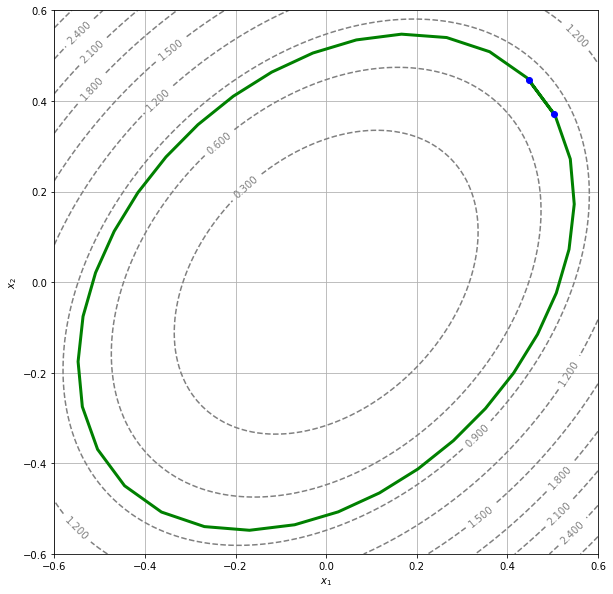

In [27]:
x0 = Newton(g1, 0.4, 0.90, eps, N)[0]
y0 = Newton(g1, 0.4, 0.90, eps, N)[1]
G=level_curve_intersec(f1, x0, y0, 0.1, 1000, eps)

display_contour(
        f1, 
        x=np.linspace(-0.6, 0.6, 100), 
        y=np.linspace(-0.6, 0.6, 100), 
        levels=10)

print(G[1])
plt.plot(G[0][0], G[0][1], color='green', linewidth=3);
plt.plot(G[0][0][0], G[0][1][0], marker='o', color='blue');
plt.plot(G[0][0][-1], G[0][1][-1], marker='o', color='blue');

115 points générés


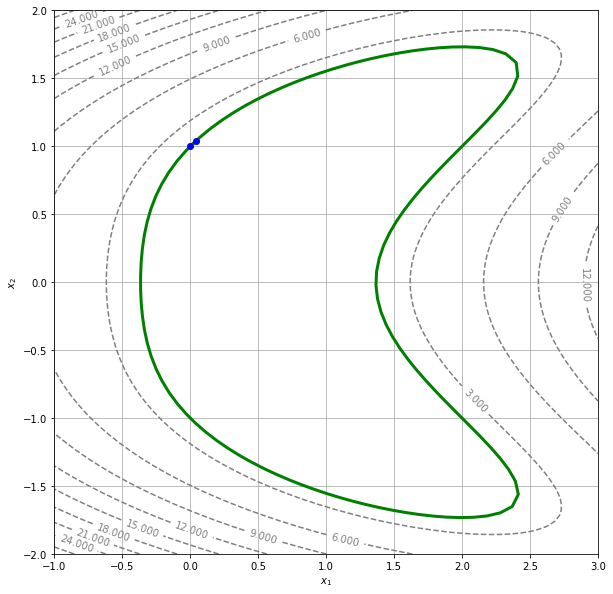

In [28]:
x0 = Newton(g2, 1.0, -1.35, eps=eps, N=N)[0]
y0 = Newton(g2, 1.0, -1.35, eps=eps, N=N)[1]

G=level_curve_intersec(f2, x0, y0, 0.1, 1000, eps)

display_contour(
        f2, 
        x=np.linspace(-1.0, 3.0, 100), 
        y=np.linspace(-2.0, 2.0, 100), 
        levels=10)

print(G[1])
plt.plot(G[0][0], G[0][1], color='green', linewidth=3);
plt.plot(G[0][0][0], G[0][1][0], marker='o', color='blue');
plt.plot(G[0][0][-1], G[0][1][-1], marker='o', color='blue');

39 points générés


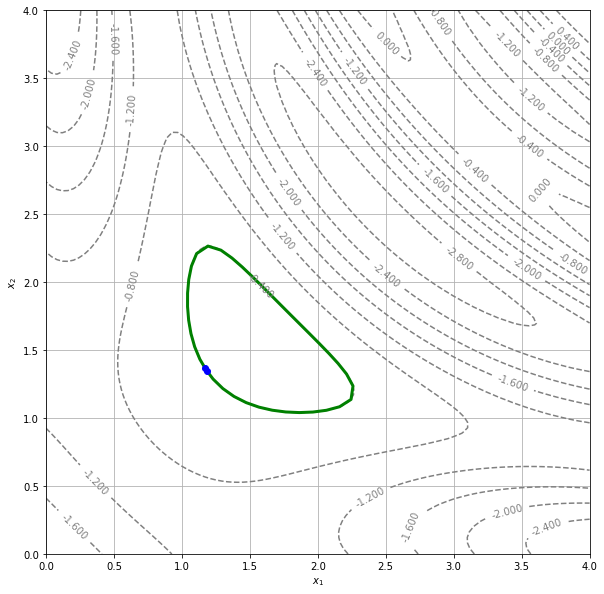

In [29]:
x0 = Newton(g3, 1.2, 1.7, eps, N)[0]
y0 = Newton(g3, 1.2, 1.7, eps, N)[1]

G=level_curve_intersec(f3, x0, y0, 0.1, 100, eps)

display_contour(
        f3,
        x=np.linspace(0.0, 4.0, 100),
        y=np.linspace(0.0, 4.0, 100),
        levels=10)

print(G[1])
plt.plot(G[0][0], G[0][1], color='green', linewidth=3);
plt.plot(G[0][0][0], G[0][1][0], marker='o', color='blue');
plt.plot(G[0][0][-1], G[0][1][-1], marker='o', color='blue');

## Post-traitement

Pour améliorer le rendu des courbes de niveau, il est tentant de diminuer la distance $\delta$ entre deux points consécutifs. Malheureusement, dans des cas d'usage réalistes, il est fréquent que la fonction $f$ soit beaucoup plus complexe que les exemples qui nous avons considérés. Le nombre de fois où cette fonction est appelée est alors le principal facteur qui détermine le temps de calcul des lignes de niveau. On cherche donc dans cette section à améliorer la qualité visuelle des résultats sans faire exploser le nombre d'évaluation de la fonction $f$. On va chercher à résoudre ce problème en reliant les points successifs par des chemins plus "flexibles" que des segments de droites, ayant le potentiel de mieux coller aux lignes de niveau.

### Interpolation 

#### Question 8

Soit $P_1$ et $P_2$ deux points du plan et $u_1$ et $u_2$ deux vecteurs du plan non nuls.
On cherche à produire un chemin $\gamma: [0,1] \to \mathbb{R}^2$ continûment différentiable, joignant $P_1$ et $P_2$ ($\gamma(0) = P_1$ et $\gamma(1) = P_2$), tel que $\gamma'(0)$ soit dans la même direction et le même sens que $u_1$ et $\gamma'(1)$ soit dans la même direction et le même sens que $u_2$.

On recherche une telle solution sous la forme
$\gamma(t) = (x(t), y(t))$ où 
$$
x(t) = a + bt + ct^2 \; \mbox{ et } \; y(t) = d + et + ft^2
$$
et les paramètres réels $a, b, c, d, e, f$ sont à déterminer(*).


Déterminer les coefficients $a, b, c, d, e, f$ solutions de ce problème quand ils existent.
Expliciter si nécessaire les conditions que doivent remplir $P_1$, $P_2$, $u_1$ et $u_2$ pour qu'une solution existe.

(*) Cf. ["Mathematical Typography" de Donald E. Knuth](https://projecteuclid.org/euclid.bams/1183544082) pp. 354-359 (Bull. Amer. Math. Soc. (N.S.), Volume 1, Number 2 (1979), 337-372), pour une classe de chemins interpolants similaire mais plus complexe.

*Solution proposée :*

Posons $P_1= \begin{pmatrix}
x_1 \\
y_1 \\
\end{pmatrix}$, $P_2= \begin{pmatrix}
x_2 \\
y_2 \\
\end{pmatrix}$, $u_1= \begin{pmatrix}
\alpha_1 \\
\beta_1 \\
\end{pmatrix}$ et $u_2= \begin{pmatrix}
\alpha_2 \\
\beta_2 \\
\end{pmatrix}$. Par ailleurs, $\gamma'(0)=\lambda u_1$ et $\gamma'(1)=\mu u_2$ où $\lambda$ et $\mu$ sont des réels strictement positifs.

Les conditions en 0 et en 1 donnent le système d'équation suivant :

$\begin{cases}
x_1=a \\
y_1=d \\
x_2=a+b+c \\
y_2=d+e+f \\
\lambda\alpha_1=b \\
\lambda\beta_1=e \\
\mu\alpha_2=b+2c \\
\mu\beta_2=e+2f
\end{cases}$ 

Donc $c=\frac{1}{2} (\mu\alpha_2-\lambda\alpha_1)$ et $f=\frac{1}{2} (\mu\beta_2-\lambda\beta_1)$.

Ainsi :

$(*)\begin{cases}
a=x_1 \\
b=\lambda\alpha_1 \\
c=\frac{1}{2} (\mu\alpha_2-\lambda\alpha_1) \\
d=y_1 \\
e=\lambda\beta_1 \\
f=\frac{1}{2} (\mu\beta_2-\lambda\beta_1)
\end{cases}$ 

Par ailleurs :

 $\begin{cases}
x_2=x_1+\lambda\alpha_1+\frac{1}{2} (\mu\alpha_2-\lambda\alpha_1)=x_1+\frac{1}{2} (\mu\alpha_2+\lambda\alpha_1) \\
y_2=y_1+\lambda\beta_1+\frac{1}{2} (\mu\beta_2-\lambda\beta_1)=y_1+\frac{1}{2} (\mu\beta_2+\lambda\beta_1)
\end{cases}$

Donc $2(P_2-P_1)=\lambda u_1 + \mu u_2$.

Ainsi, il existe une solution ssi il existe $\lambda$ et $\mu$ des réels strictement positifs tels que  $2(P_2-P_1)=\lambda u_1 + \mu u_2$ et cette solution est alors entièrement décrite par $(*)$.

#### Tâche 6

Implémenter la solution sous la forme d'une fonction `gamma` dont les arguments sont `t`, `P1`, `P2`, `u1` et `u2` et qui renvoie le ou les points $\gamma(t)$ associés. Lorsqu'il n'existe pas de chemin de la forme souhaitée pour les paramètres `P1`, `P2`, `u1` et `u2`, on utilisera comme remplacement de $\gamma$ un chemin rectiligne interpolant linéairement les points $P_1$ et $P_2$.

Pour des raisons de performance, on vectorisera cette fonction par rapport à `t` : 

  - en acceptant comme argument `t` des tableaux NumPy (monodimensionels) de nombres flottants et en renvoyant alors un tableau de taille `(2, len(t))` flottants décrivant l'abscisse et l'ordonnée des `len(t)` points $\gamma(t)$ correspondant,

  - en appliquant directement opérateurs et fonctions mathématiques aux tableaux NumPy, sans utiliser de boucle `for`,
  
On validera ensuite graphiquement l'implémentation sur un exemple où l'on représentera les point $P_1$ et $P_2$, les tangentes associées et le chemin $\gamma$ correspondant.




>Dans la fonction `gamma` :
- Nous créons la matrice formée des vecteurs u1 et u2 en colonnes et nous déterminons si elle est inversible (u1 et u2 libres)
- Lorsque cette matrice est inversible, nous déterminons les solutions uniques en exploitant le système
- Nous appliquons finalement fonctions polynomiales au tableau t pour obtenir les coordonnées de gamma
- Le cas où la matrice est non inversible, ie. les vecteurs $u1$ et $u2$ sont colinéaires (ici aussi très rare) conduira à un chemin rectiligne interpolant linéairement les points $P1$ et $P2$

In [30]:
def gamma(t, P1, P2, u1, u2):
    M = np.array([[u1[0], u2[0]], [u1[1], u2[1]]])
    a, d = P1[0], P1[1]
    if np.linalg.det(M) != 0:
        lamb = np.dot(np.linalg.inv(M), 2*(P2 - P1))[0]
        mu = np.dot(np.linalg.inv(M), 2*(P2 - P1))[1]
        b = lamb*u1[0]
        e = lamb*u1[1]
        c = P2[0] - P1[0] - b
        f = P2[1] - P1[1] - e
        return np.array([a + b*t + c*(t**2), d + e*t + f*(t**2)])
    else:
        return np.array([min(P1[0], P2[0]) + t*abs(P2[0]-P1[0]), min(P1[1], P2[1]) + t*abs(P2[1]-P1[1])])

Vérifions que notre fonction gamma fait bien ce que l'on souhaite :

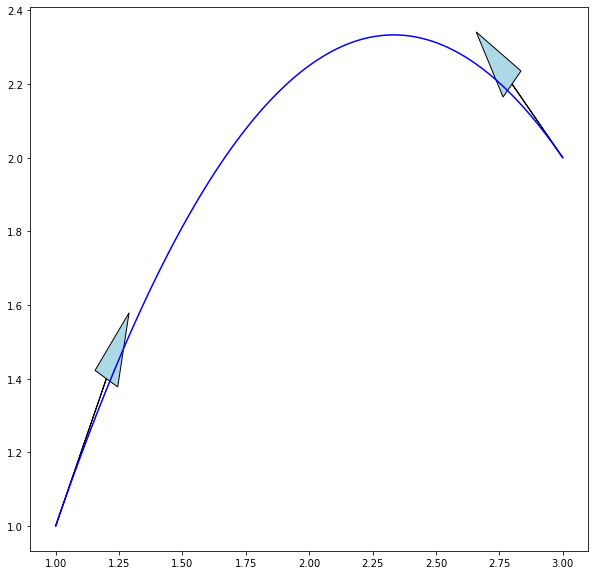

In [31]:
t = np.linspace(0, 1, 100)
P1 = np.array([1, 1])
P2 = np.array([3, 2])
u1 = np.array([1, 2])
u2 = np.array([-1, 1])

plt.plot(gamma(t, P1, P2, u1, u2)[0], gamma(t, P1, P2, u1, u2)[1], color='blue');
plt.arrow(P1[0], P1[1], u1[0]/5, u1[1]/5, head_width=0.1, head_length=0.2,
fc='lightblue', ec='black');
plt.arrow(P2[0], P2[1], u2[0]/5, u2[1]/5, head_width=0.1, head_length=0.2,
fc='lightblue', ec='black');

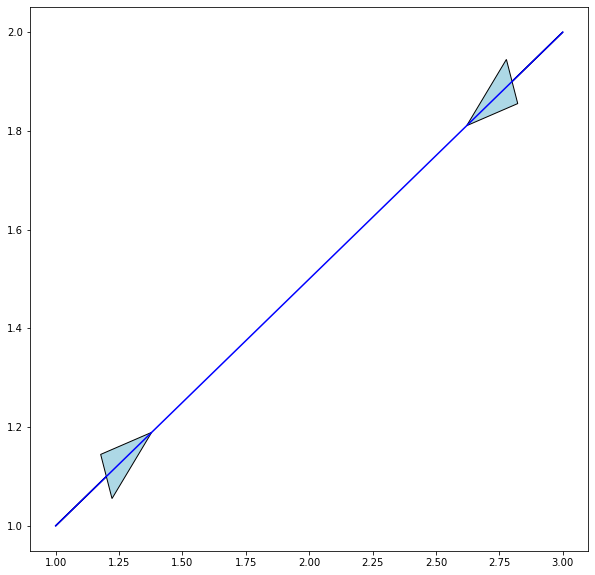

In [32]:
t = np.linspace(0, 1, 100)
P1 = np.array([1, 1])
P2 = np.array([3, 2])
u1 = np.array([2, 1])
u2 = np.array([-2, -1])

plt.plot(gamma(t, P1, P2, u1, u2)[0], gamma(t, P1, P2, u1, u2)[1], color='blue');
plt.arrow(P1[0], P1[1], u1[0]/10, u1[1]/10, head_width=0.1, head_length=0.2,
fc='lightblue', ec='black');
plt.arrow(P2[0], P2[1], u2[0]/10, u2[1]/10, head_width=0.1, head_length=0.2,
fc='lightblue', ec='black');

### Intégration

#### Tâche 7
Intégrer le mécanisme d'interpolation dans (une nouvelle version de) la fonction `level_curve` qui accepte un nouveau paramètre entier `oversampling` (sur-échantillonnage) tel que :

  - si `oversampling == 1`, la fonction `level_curve` fonctionne comme précédemment,

  - si `oversampling > 1`, la fonction `level_curve` introduit dans son résultat `oversampling - 1` points supplémentaires obtenus par interpolations entre chaque couple de points consécutifs obtenus par la méthode de Newton.

>Dans la nouvelle fonction `level_curve_intersec_gamma` quelques modifications sont faites sur la base de la fonction `level_curve_intersec` :
- Lors de chaque passage dans la boucle principale nous appliquons `gamma` aux deux derniers points générés $P3$ et $P4$
- Nous créons un tableau t contenant un nombre $oversampling+1$ de doubles régulièrement espacés entre 0 et 1 et nous créons les vecteurs $u1$ et $u2$ correspondant aux rotations de $\pi/2$ des gradients de la fonction $F$ aux points $P3$ et $P4$, c'est à dire deux vecteurs directeurs des tangentes aux points $P3$ et $P4$
- Ensuite nous ajoutons simplement toutes les coordonnées calculées par la fonction `gamma` aux listes des abscisses et des ordonnées

In [33]:
def level_curve_intersec_gamma(F, x0, y0, oversampling, delta=0.1, N=1000, eps=eps):
    c = F(x0, y0)
    abs, ord = [x0], [y0]
    def rotation(x0, y0): #rotation de pi/2 sens trigo
        a = x0 + (grad(F)(x0, y0)[1]*delta)/np.linalg.norm(grad(F)(x0, y0))
        b = y0 - (grad(F)(x0, y0)[0]*delta)/np.linalg.norm(grad(F)(x0, y0))
        return a, b
    P1 = np.array([x0, y0])
    P3 = np.array([0, 0])
    P4 = np.array([x0, y0])
    
    for i in range(N):
        def g(x1, y1):
            return np.array([F(x1, y1) - c, (x1-x0)**2 + (y1-y0)**2 - delta**2])
        a, b = rotation(x0, y0)
        A=(Newton(g, a, b, eps, 100))
        
        #le point P2 correspond au deuxième point généré et reste constant
        if i==0: P2 = np.array([A[0], A[1]])
        P3 = P4
        P4 = np.array([A[0], A[1]])
        
        ##nouvelle partie du code :
        u1 = np.array([a-x0, b-y0])
        u2 = np.array([(rotation(A[0], A[1])[0]-A[0]), rotation(A[0], A[1])[1]-A[1]])
        t = np.linspace(0, 1, oversampling+1)
        B = gamma(t, P3, P4, u1, u2)
        #nous ajoutons tous les éléments de gamma sauf le dernier
        #car il sera le premier dans la prochaine fonction gamma
        for k in range(len(B[0])-1):
            abs.append(B[0][k])
            ord.append(B[1][k])
        
        x0, y0 = A[0] , A[1]
        #la condition i>3 permet de s'assurer que P3 ne coincide avec aucun des points P1 et P2
        if i>3 and intersec(P1, P2, P3, P4, delta):
            #on rajoute le dernier point généré par la fonction gamma lors du dernier passage dans la boucle
            abs.append(B[0][oversampling])
            ord.append(B[1][oversampling])
            return np.array([abs, ord]), f'{oversampling*(i+1)+1} points générés'
    return np.array([abs, ord]), f'{oversampling*N} points générés'

#### Tâche 8

Valider graphiquement le résultat au moyen des exemples de référence.

>Dans les cellules suivantes nous exécutons la fonction `level_curve_intersec` que nous représentons en vert avec $delta = 0.2$ et en même temps nous exécutons et représentons en bleu la fonction `level_curve_intersec_gamma` avec la même valeur de $delta$ et $oversamping = 5$

18 points générés sans arrondi
86 points générés avec arrondi et oversampling=5


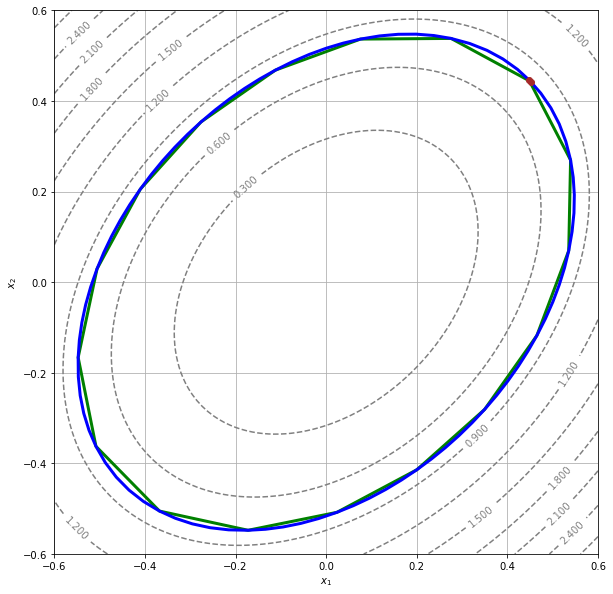

In [34]:
x0 = Newton(g1, 0.4, 0.90, eps, N)[0]
y0 = Newton(g1, 0.4, 0.90, eps, N)[1]
G = level_curve_intersec(f1, x0, y0, 0.2, 100, eps)
G5 = level_curve_intersec_gamma(f1, x0, y0, 5, 0.2, 100, eps)

display_contour(
        f1, 
        x=np.linspace(-0.6, 0.6, 100), 
        y=np.linspace(-0.6, 0.6, 100), 
        levels=10)

print(G[1], 'sans arrondi')
print(G5[1], 'avec arrondi et oversampling=5')
plt.plot(G[0][0], G[0][1], color='green', linewidth=3);
plt.plot(G5[0][0], G5[0][1], color='blue', linewidth=3);
plt.plot(G[0][0][0], G[0][1][0], marker='o', color='brown');
plt.plot(G[0][0][-1], G[0][1][-1], marker='o', color='brown');

58 points générés sans arrondi
286 points générés avec arrondi et oversampling=5


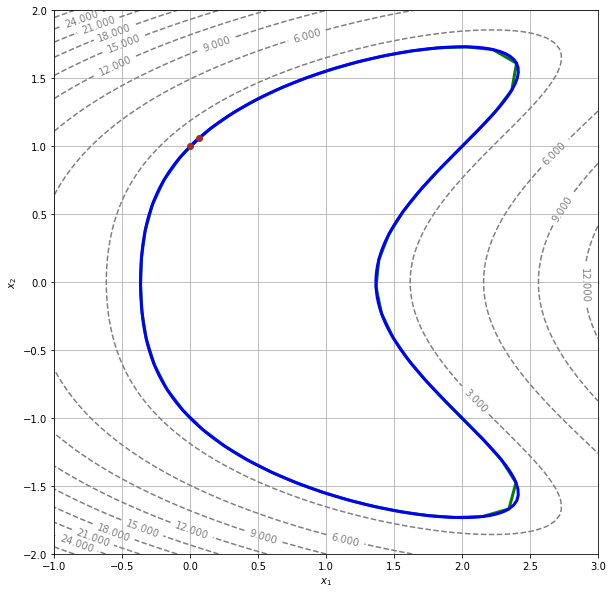

In [35]:
x0 = Newton(g2, 1.0, -1.35, eps=eps, N=N)[0]
y0 = Newton(g2, 1.0, -1.35, eps=eps, N=N)[1]

G = level_curve_intersec_gamma(f2, x0, y0, 1, 0.2, 1000, eps)
G5 = level_curve_intersec_gamma(f2, x0, y0, 5, 0.2, 1000, eps)

display_contour(
        f2, 
        x=np.linspace(-1.0, 3.0, 100), 
        y=np.linspace(-2.0, 2.0, 100), 
        levels=10)

print(G[1], 'sans arrondi')
print(G5[1], 'avec arrondi et oversampling=5')
plt.plot(G[0][0], G[0][1], color='green', linewidth=3);
plt.plot(G5[0][0], G5[0][1], color='blue', linewidth=3);
plt.plot(G[0][0][0], G[0][1][0], marker='o', color='brown');
plt.plot(G[0][0][-1], G[0][1][-1], marker='o', color='brown');

20 points générés sans arrondi
96 points générés avec arrondi et oversampling=5


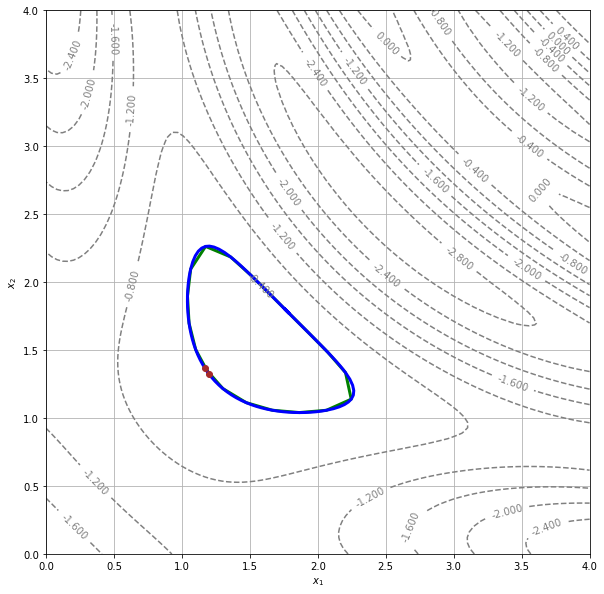

In [36]:
x0 = Newton(g3, 1.2, 1.7, eps, N)[0]
y0 = Newton(g3, 1.2, 1.7, eps, N)[1]

G = level_curve_intersec_gamma(f3, x0, y0, 1, 0.2, 100, eps)
G5 = level_curve_intersec_gamma(f3, x0, y0, 5, 0.2, 1000, eps)

display_contour(
        f3,
        x=np.linspace(0.0, 4.0, 100),
        y=np.linspace(0.0, 4.0, 100),
        levels=10)

print(G[1], 'sans arrondi')
print(G5[1], 'avec arrondi et oversampling=5')
plt.plot(G[0][0], G[0][1], color='green', linewidth=3);
plt.plot(G5[0][0], G5[0][1], color='blue', linewidth=3);
plt.plot(G[0][0][0], G[0][1][0], marker='o', color='brown');
plt.plot(G[0][0][-1], G[0][1][-1], marker='o', color='brown');